# 1 Set Up

In [7]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection

In [8]:
# Enable cache
ff1.Cache.enable_cache('cache') # arg is folder name

In [9]:
# Enable plotting settings
ff1.plotting.setup_mpl()

## Helpers

In [15]:
session_identifiers_abbreviated = ['FP1', 'FP2', 'FP3', 'Q', 'S', 'SQ', 'R']
session_identifiers_full = ['Practice 1', 'Practice 2', 'Practice 3', 'Sprint Qualifying', 'Sprint', 'Qualifying', 'Race']

# 2 General Functions

## 2.a Get Formula 1 Schedule

In [16]:
schedule = ff1.get_event_schedule(2023)
schedule

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25 19:30:00,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00,Practice 2,2023-02-24 10:00:00,Practice 3,2023-02-25 10:00:00,None,NaT,None,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00,Practice 2,2023-03-03 18:00:00,Practice 3,2023-03-04 14:30:00,Qualifying,2023-03-04 18:00:00,Race,2023-03-05 18:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00,Practice 2,2023-03-17 20:00:00,Practice 3,2023-03-18 16:30:00,Qualifying,2023-03-18 20:00:00,Race,2023-03-19 20:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02 17:00:00,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00,Practice 2,2023-03-31 16:00:00,Practice 3,2023-04-01 12:30:00,Qualifying,2023-04-01 16:00:00,Race,2023-04-02 15:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30 17:00:00,Azerbaijan Grand Prix,sprint,Practice 1,2023-04-28 13:30:00,Qualifying,2023-04-28 17:00:00,Practice 2,2023-04-29 13:30:00,Sprint,2023-04-29 17:30:00,Race,2023-04-30 15:00:00,True
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07 17:30:00,Miami Grand Prix,conventional,Practice 1,2023-05-05 14:30:00,Practice 2,2023-05-05 18:00:00,Practice 3,2023-05-06 12:30:00,Qualifying,2023-05-06 16:00:00,Race,2023-05-07 15:30:00,True
6,6,Italy,Imola,FORMULA 1 QATAR AIRWAYS GRAN PREMIO DEL MADE I...,2023-05-21 17:00:00,Emilia Romagna Grand Prix,conventional,Practice 1,2023-05-19 13:30:00,Practice 2,2023-05-19 17:00:00,Practice 3,2023-05-20 12:30:00,Qualifying,2023-05-20 16:00:00,Race,2023-05-21 15:00:00,True
7,7,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28 17:00:00,Monaco Grand Prix,conventional,Practice 1,2023-05-26 13:30:00,Practice 2,2023-05-26 17:00:00,Practice 3,2023-05-27 12:30:00,Qualifying,2023-05-27 16:00:00,Race,2023-05-28 15:00:00,True
8,8,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04 17:00:00,Spanish Grand Prix,conventional,Practice 1,2023-06-02 13:30:00,Practice 2,2023-06-02 17:00:00,Practice 3,2023-06-03 12:30:00,Qualifying,2023-06-03 16:00:00,Race,2023-06-04 15:00:00,True
9,9,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18 16:00:00,Canadian Grand Prix,conventional,Practice 1,2023-06-16 13:30:00,Practice 2,2023-06-16 17:00:00,Practice 3,2023-06-17 12:30:00,Qualifying,2023-06-17 16:00:00,Race,2023-06-18 14:00:00,True


## 2.b Get Formula 1 Session

In [20]:
session = ff1.get_session(2023, 'Bahrain', 'Q') # year, grand prix, event identifier (see helpers)
session # to grab the session data
session.load() # to load from cache

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


## 2.c Explore Laps

In [22]:
# Explore Hamilton's lap data
laps_ham = session.laps.pick_driver('HAM')
# get telemetry from Hamilton's fastest lap
laps_ham.pick_fastest().get_telemetry()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2023-03-04 16:03:55.183,0 days 01:18:54.186000,,413.585556,0 days 00:00:00,10798,293,8,100,False,12,interpolation,0.153627,0.000029,OnTrack,-382,1264,-167
3,2023-03-04 16:03:55.299,0 days 01:18:54.302000,,413.585556,0 days 00:00:00.116000,10814,294,8,100,False,12,pos,9.727473,0.001807,OnTrack,-377,1353,-159
4,2023-03-04 16:03:55.498,0 days 01:18:54.501000,,413.585556,0 days 00:00:00.315000,10845,295,8,100,False,12,pos,26.137498,0.004857,OnTrack,-369,1517,-159
5,2023-03-04 16:03:55.535,0 days 01:18:54.538000,,413.585556,0 days 00:00:00.352000,10876,297,8,100,False,12,car,29.186667,0.005423,OnTrack,-367,1547,-159
6,2023-03-04 16:03:55.658,0 days 01:18:54.661000,,413.585556,0 days 00:00:00.475000,10926,297,8,100,False,12,pos,39.318630,0.007306,OnTrack,-363,1649,-159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2023-03-04 16:05:25.178,0 days 01:20:24.181000,63,327.847222,0 days 00:01:29.995000,10592,288,8,100,False,12,pos,5349.667563,0.994010,OnTrack,-397,947,-159
691,2023-03-04 16:05:25.336,0 days 01:20:24.339000,63,323.547222,0 days 00:01:30.153000,10630,290,8,100,False,12,car,5362.437778,0.996383,OnTrack,-389,1080,-158
692,2023-03-04 16:05:25.399,0 days 01:20:24.402000,63,323.547222,0 days 00:01:30.216000,10670,290,8,100,False,12,pos,5367.539741,0.997331,OnTrack,-386,1154,-158
693,2023-03-04 16:05:25.559,0 days 01:20:24.562000,63,323.547222,0 days 00:01:30.376000,10710,291,8,100,False,12,pos,5380.522827,0.999743,OnTrack,-375,1397,-159


# 3 Plotting

In [40]:
driver_1, driver_2 = 'VER', 'NOR'

In [41]:
# get laps from session for Alonso and Hamilton
laps_driver_1 = session.laps.pick_driver(driver_1)
laps_driver_2 = session.laps.pick_driver(driver_2)
# get fastest laps per session
fastest_lap_driver_1 = laps_driver_1.pick_fastest()
fastest_lap_driver_2 = laps_driver_2.pick_fastest()
# get telemetry
telemetry_1 = fastest_lap_driver_1.get_telemetry()
telemetry_2 = fastest_lap_driver_2.get_telemetry()

In [42]:
# calculate delta time
delta_time, ref_tel, compare_tel = ff1.utils.delta_time(fastest_lap_driver_1, fastest_lap_driver_2)

In [43]:
# identify teams
team_driver_1 = laps_driver_1['Team'].iloc[0]
team_driver_2 = laps_driver_2['Team'].iloc[0]
# identify colors
color_1 = ff1.plotting.team_color(team_driver_1)
color_2 = ff1.plotting.team_color(team_driver_2)

[Text(0, 0.5, 'DRS')]

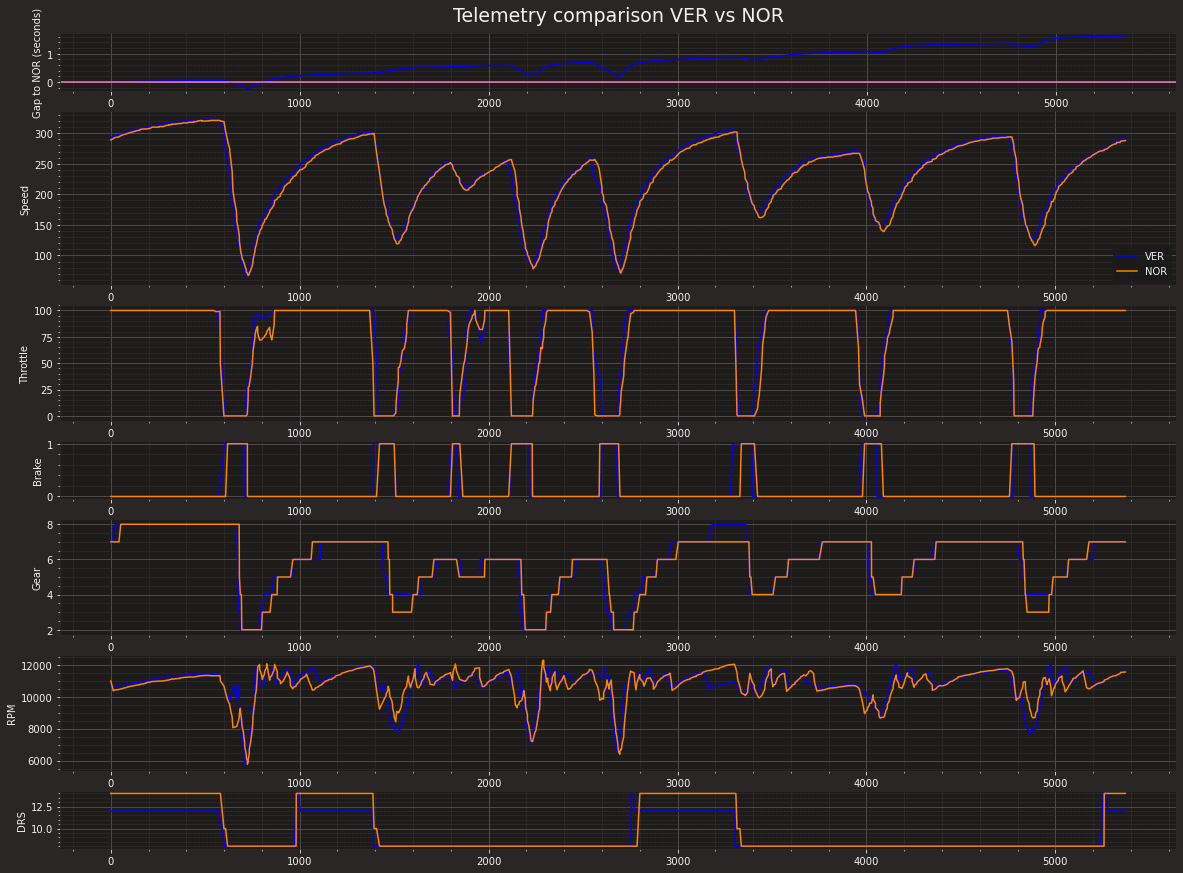

In [49]:
# set size of plot
plt.rcParams['figure.figsize'] = [20,15]
# define subplots (delta, speed, throttle, braking, gear, rpm, drs)
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': [1,3,2,1,2,2,1]})

# set title of plot
ax[0].title.set_text(f"Telemetry comparison {driver_1} vs {driver_2}")

# Subplot 1: delta
ax[0].plot(ref_tel['Distance'], delta_time, color=color_1) # reference telemetry distance measured by delta time for driver 1
ax[0].axhline(0) # plot benchmark, horizontal line at 0, "where the gap / benchmark will be"
ax[0].set(ylabel=f"Gap to {driver_2} (seconds)")

# Subplot 2: speed
ax[1].plot(telemetry_1['Distance'], telemetry_1['Speed'], label=driver_1, color=color_1)
ax[1].plot(telemetry_2['Distance'], telemetry_2['Speed'], label=driver_2, color=color_2)
ax[1].set(ylabel="Speed")
ax[1].legend(loc="lower right")

# Subplot 3: throttle
ax[2].plot(telemetry_1['Distance'], telemetry_1['Throttle'], label=driver_1, color=color_1)
ax[2].plot(telemetry_2['Distance'], telemetry_2['Throttle'], label=driver_2, color=color_2)
ax[2].set(ylabel="Throttle")

# Subplot 4: braking
ax[3].plot(telemetry_1['Distance'], telemetry_1['Brake'], label=driver_1, color=color_1)
ax[3].plot(telemetry_2['Distance'], telemetry_2['Brake'], label=driver_2, color=color_2)
ax[3].set(ylabel="Brake")

# Subplot 5: gear
ax[4].plot(telemetry_1['Distance'], telemetry_1['nGear'], label=driver_1, color=color_1)
ax[4].plot(telemetry_2['Distance'], telemetry_2['nGear'], label=driver_2, color=color_2)
ax[4].set(ylabel="Gear")

# Subplot 6: rpm
ax[5].plot(telemetry_1['Distance'], telemetry_1['RPM'], label=driver_1, color=color_1)
ax[5].plot(telemetry_2['Distance'], telemetry_2['RPM'], label=driver_2, color=color_2)
ax[5].set(ylabel="RPM")

# Subplot 7: drs
ax[6].plot(telemetry_1['Distance'], telemetry_1['DRS'], label=driver_1, color=color_1)
ax[6].plot(telemetry_2['Distance'], telemetry_2['DRS'], label=driver_2, color=color_2)
ax[6].set(ylabel="DRS")

## 3.a Minisector Comparison